# Telescopes - PCA Project

## Import Packages

In [3]:
import warnings  # Supress warnings

warnings.filterwarnings("ignore")
import os  # Interact with the operating system.
import sys  # Read system parameters.
from io import StringIO  # Read and write strings as files
from urllib.parse import urlparse  # Parse URL and extract path component

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests  # Send HTTP requests
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

print("Libraries used in this project:")
print("- Python {}".format(sys.version))
print("- NumPy {}".format(np.__version__))
print("- pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(mpl.__version__))
print("- Seaborn {}".format(sns.__version__))
print("- scikit-learn {}\n".format(sklearn.__version__))

Libraries used in this project:
- Python 3.9.20 (main, Oct  3 2024, 02:27:54) 
[Clang 14.0.6 ]
- NumPy 1.22.3
- pandas 1.4.1
- Matplotlib 3.8.4
- Seaborn 0.13.0
- scikit-learn 1.2.2



## Load the Dataset

In [4]:
"""Capture URL"""

url = "https://raw.githubusercontent.com/tyrantdavis/datasets/refs/heads/main/telescope.csv"

"""Get the request object"""
request = requests.get(url).text

"""Save as data frame and copy"""
telescopes = pd.read_csv(StringIO(request))
df = telescopes.copy()

"""Parse the URL"""
parsed_url = urlparse(url)
path = parsed_url.path
filename = os.path.basename(path)


print(f"Loaded {len(df)} telescope records from {filename}.")

Loaded 19020 telescope records from telescope.csv.


### Task 1: Drop nan values.

#### Drop null and nan values

In [5]:
df.dropna()

,pindex,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pindex    19020 non-null  int64  
 1   fLength   19020 non-null  float64
 2   fWidth    19020 non-null  float64
 3   fSize     19020 non-null  float64
 4   fConc     19020 non-null  float64
 5   fConc1    19020 non-null  float64
 6   fAsym     19020 non-null  float64
 7   fM3Long   19020 non-null  float64
 8   fM3Trans  19020 non-null  float64
 9   fAlpha    19020 non-null  float64
 10  fDist     19020 non-null  float64
 11  class     19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


**Spotlights** 

Attribute information:

1. pindex pseudo index
2. fLength: continuous -- major axis of ellipse [mm]
3. fWidth: continuous -- minor axis of ellipse [mm]
4. fSize: continuous -- 10-log of sum of content of all pixels [in #phot]
5. fConc: continuous -- ratio of sum of two highest pixels over fSize [ratio]
6. fConc1: continuous -- ratio of highest pixel over fSize [ratio]
7. fAsym: continuous -- distance from highest pixel to center, projected onto major axis [mm]
8. fM3Long: continuous -- 3rd root of third moment along major axis [mm]
9. fM3Trans: continuous -- 3rd root of third moment along minor axis [mm]
10. fAlpha: continuous -- angle of major axis with vector to origin [deg]
11. fDist: continuous -- distance from origin to center of ellipse [mm]


- The training set includes **19020 rows** and **12 columns**.
- 11 columns contain float values, **1** column contains integer values,  and **1** column contains object values.
- There is **no missing data** as all rows have values for every column.
  

### Drop Unused Column

The pseudo index column does not offer any valuable insights for the project's goals, so it will be eliminated.

In [7]:
df.drop(columns=["pindex"], inplace=True)

#### Example data samples

In [8]:
print("Task 1:")
df.head()

Task 1:


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


g    12332
h     6688
Name: class, dtype: int64


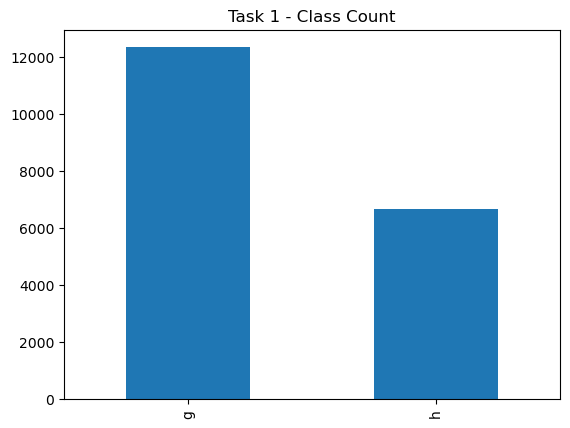

In [9]:
multiclass = df["class"].value_counts()
multiclass.plot(kind="bar", title="Task 1 - Class Count", grid=False)
print(multiclass)

**Spotlights** 

The class feature is comprised of multiple classes: 

- Class **g** -- gamma(signal)
- Class **h** -- hadrons(background)

In [10]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000
